*Downloading the dataset*

170498071/170498071 [==============================] - 5s 0us/step


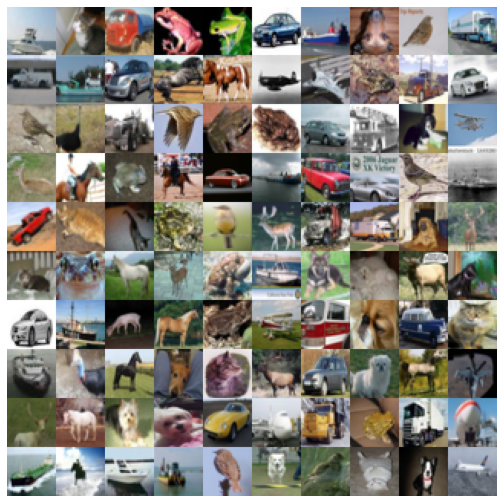

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Importing the dataset
from keras.datasets import cifar10
from keras.utils import np_utils

# Downloading the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Making train samples
X_train = X_train.astype('float32')
X_train /= 255
X_train, X_valid = X_train[:45000], X_train[45000:]

y_train = np_utils.to_categorical(y_train)
y_train, y_valid = y_train[:45000], y_train[45000:]

# Making test samples
X_test = X_test.astype('float32')
X_test /= 255
y_test = np_utils.to_categorical(y_test)
#%%

def plot_digits(instances, images_per_row=10, **options):
  size = 32
  images_per_row = min(len(instances), images_per_row)
  images = [instance.reshape(size,size, 3) for instance in instances]
  n_rows = (len(instances) - 1) // images_per_row + 1
  row_images = []
  n_empty = n_rows * images_per_row - len(instances)
  images.append(np.zeros((size, size * n_empty)))
  for row in range(n_rows):
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
#%%
plt.figure(figsize=(9,9))
example_images = X_train[100:200]
plot_digits(example_images, images_per_row=10)
plt.show()

from keras import models, layers

# Model creation
model = models.Sequential([
    layers.Conv2D(64, 3, activation="relu", input_shape=[32, 32, 3]),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 2, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

# Printing model summary
model.summary()
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# Printing testing and validation accuracy and loss plot
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluating the Unseen data
model.evaluate(X_valid, y_valid)

*Model creation - with less than 100K learnable params*

In [1]:
from keras import models, layers

# Model creation
model = models.Sequential([
    layers.Conv2D(64, 3, activation="relu", input_shape=[32, 32, 3]),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 2, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dropout (Dropout)           (None, 6272)              0

*Compiling and Training the Model*

In [ ]:
# Compiling and Training the Model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

*Plotting the accuracies*

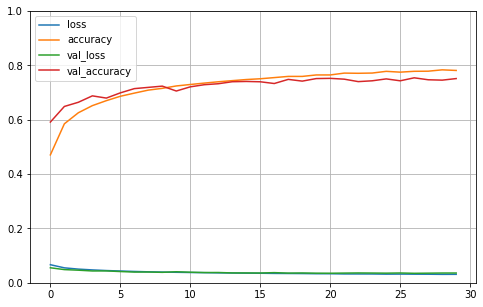

157/157 [==============================] - 4s 23ms/step - loss: 0.0360 - accuracy: 0.7514


[0.036013808101415634, 0.7513999938964844]

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluating the Unseen data
model.evaluate(X_valid, y_valid)